# Advanced Classification of Disaster-Related Tweets Using Deep Learning

## Introduction
In this project, we will build a deep learning model using Keras to classify tweets as real or fake in the context of disasters. This task is inspired by the "NLP with Disaster Tweets" challenge and enriched with additional data to improve model performance and insights. The dataset provides a fascinating opportunity to explore Natural Language Processing (NLP) techniques on real-world data.

---

## Dataset Overview
### Context
The dataset contains over 11,000 tweets associated with disaster-related keywords such as "crash," "quarantine," and "bush fires." The data structure is based on the original "Disasters on social media" dataset. It includes:
- **Tweets:** The text of the tweet.
- **Keywords:** Specific disaster-related keywords.
- **Location:** The geographical information provided in the tweets.

These tweets were collected on **January 14th, 2020** and cover major events including:
- The eruption of Taal Volcano in Batangas, Philippines.
- The emerging outbreak of **Coronavirus (COVID-19)**.
- The devastating **Bushfires in Australia**.
- The **Iranian downing of flight PS752**.

### Important Note
The dataset contains text that may include profane, vulgar, or offensive language. Please approach with caution during analysis.

---

## Project Goals
### Inspiration
The primary goal of this project is to develop a machine learning model capable of identifying whether a tweet is genuinely related to a disaster or not. This involves:
1. Enriching the already available data with newly collected, manually classified tweets.
2. Leveraging state-of-the-art deep learning methods to extract meaningful insights.
3. Applying NLP techniques to preprocess, clean, and tokenize the tweets for model training.

This notebook will walk through the process of preparing the dataset, building a deep learning model, and evaluating its performance. By the end, we aim to achieve a robust model that can classify disaster tweets with high accuracy.

---

## Why It Matters
Effective classification of disaster-related tweets has numerous practical applications:
- **Emergency Response:** Helps organizations identify critical information in real time.
- **Resource Allocation:** Facilitates better planning by focusing on real disasters.
- **Misinformation Control:** Mitigates the spread of false information during crises.

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import os

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [16]:
# Load the dataset
data = pd.read_csv('tweets.csv')

# Display the first few rows to inspect the dataset
print(data.head())

# Display dataset information (columns, data types, non-null counts)
print(data.info())

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11370 entries, 0 to 11369
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11370 non-null  int64 
 1   keyword   11370 non-null  object
 2   location  7952 non-null   object
 3   text      11370 non-null  object
 4   target    11370 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 444.3+ 

Ensure the dataset contains the required columns, such as:
- `text`: The tweet content.
- `target`: The classification label indicating whether the tweet is fake or not.

In [17]:
# Verify required columns
assert 'text' in data.columns, "Column 'text' is missing in the dataset."
assert 'target' in data.columns, "Column 'target' is missing in the dataset."

## 2. Data Visualization

In this section, we conduct a detailed exploratory data analysis (EDA) to understand the structure and distribution of our dataset. EDA is crucial for identifying potential challenges, trends, and biases within the data, which in turn helps in selecting the most suitable models and preprocessing steps.

### 2.1 Dataset Size

First, we print the size of both the training and testing datasets. This gives us an idea of how many data points we are working with, which is essential when evaluating model performance and understanding the balance of the dataset.


In [19]:
print("Training dataset size: ", len(data))

Training dataset size:  11370


## 2.2 Class Distribution in Training Data
Next, we examine the distribution of the target variable in the training set. The target variable indicates whether a tweet is related to a **disaster (1) or not (0)**. **Understanding the class distribution helps identify if the dataset is imbalanced**, which could influence the choice of model or evaluation metrics (e.g., using precision-recall curves instead of accuracy).

In [20]:
# Display the count of tweets for each target class in the training set
data['target'].value_counts()

,count
target,
0,9256
1,2114


We then plot a histogram of the target variable to visualize the distribution of disaster and non-disaster tweets in the training data. This graphical representation makes it easier to spot any imbalance.

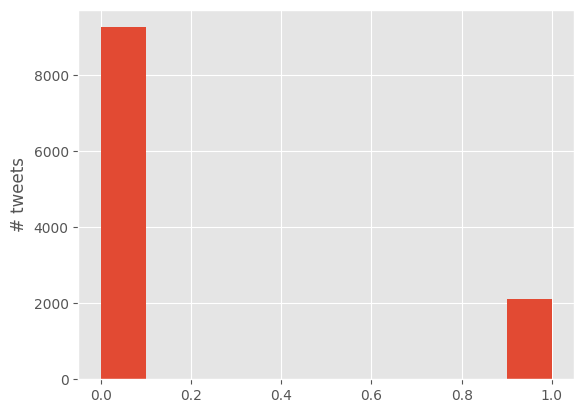

In [21]:
data['target'].hist()
plt.ylabel("# tweets")
plt.show()

## 2.3 Exploratory Analysis of Tweet Length
### 2.3.1 Word Count per Tweet
A useful aspect of text data is the length of the text. Here, we explore the number of words per tweet. This metric can help us understand the average tweet size for both disaster-related and non-disaster-related tweets, which may inform decisions on feature engineering, such as tokenization or padding.

We use histograms to display the word count for each category of tweets (disaster vs. non-disaster).

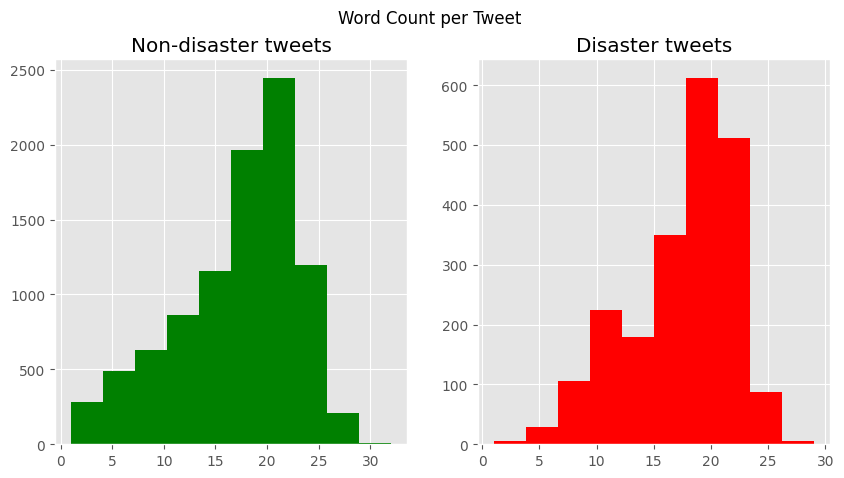

In [22]:
# Calculate the number of words per tweet for each category (disaster vs non-disaster)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

tweet_len_0 = data[data['target'] == 0]['text'].str.split().map(lambda x: len(x))  # Non-disaster tweets
tweet_len_1 = data[data['target'] == 1]['text'].str.split().map(lambda x: len(x))  # Disaster tweets

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non-disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Word Count per Tweet')

plt.show()

#### 2.3.2 Unique Word Count per Tweet
Next, we analyze the number of unique words per tweet. This measure indicates how diverse the vocabulary is for each tweet and can be an important factor when building feature sets **like word embeddings or TF-IDF.**

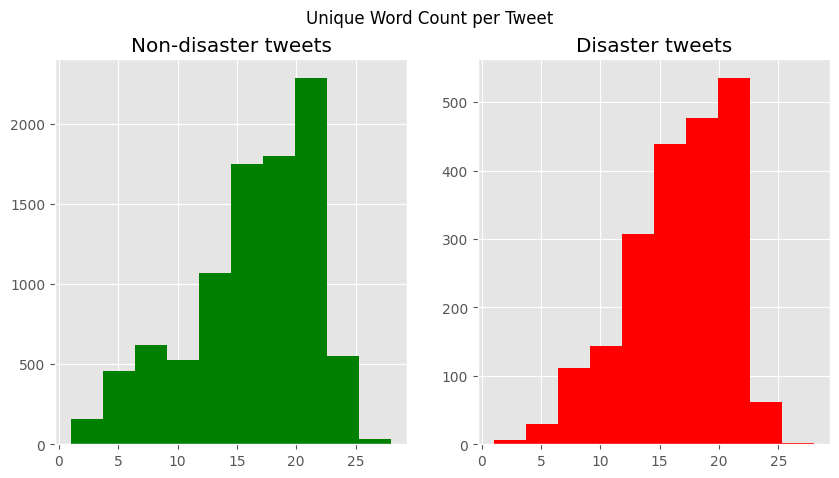

In [23]:
# Calculate the number of unique words per tweet for each category
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

tweet_len_0 = data[data['target'] == 0]['text'].str.split().map(lambda x: len(set(x)))  # Non-disaster tweets
tweet_len_1 = data[data['target'] == 1]['text'].str.split().map(lambda x: len(set(x)))  # Disaster tweets

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non-disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Unique Word Count per Tweet')

plt.show()

### 2.3.3 Average Word Length per Tweet
Lastly, we investigate the average length of the words used in the tweets. This measure provides insight into the complexity or simplicity of the language used in disaster vs. non-disaster tweets. A higher average word length might indicate more formal or technical language, whereas shorter words could suggest more informal communication.

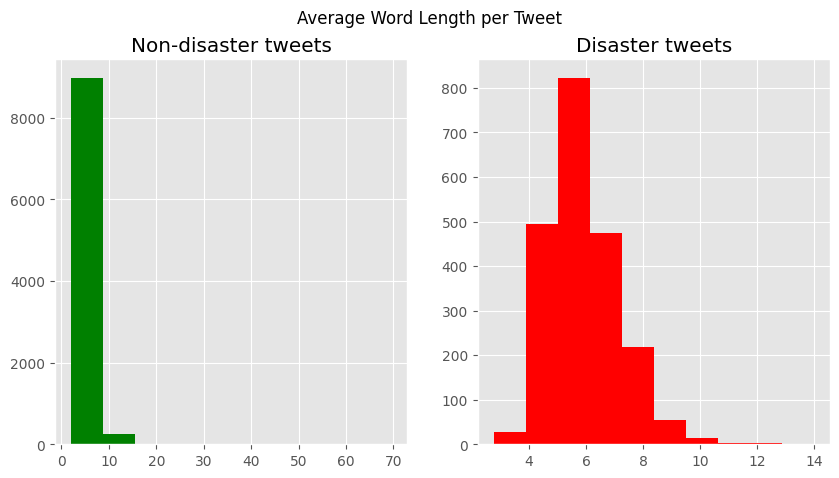

In [24]:
# Calculate the average word length per tweet for each category
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

tweet_len_0 = data[data['target'] == 0]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))  # Non-disaster tweets
tweet_len_1 = data[data['target'] == 1]['text'].str.split().map(lambda x: np.mean([len(i) for i in x]))  # Disaster tweets

ax1.hist(tweet_len_0, color='green')
ax1.set_title('Non-disaster tweets')

ax2.hist(tweet_len_1, color='red')
ax2.set_title('Disaster tweets')

fig.suptitle('Average Word Length per Tweet')

plt.show()


## 2.4 Further Feature Calculations

In addition to the basic tweet length analysis, we could calculate several other features that may provide additional insights for modeling. These features include:

* Number of **words** at the end of a tweet
* Number of **URLs** per tweet
* **Average** number of characters per tweet
* Number of **characters** per tweet
* Number of punctuation marks per tweet
* Number of **hashtags** per tweet
* Number of **mentions** (@) per tweet

These additional features could be crucial when constructing advanced models or for improving the understanding of tweet content.

## 2.5 Stopwords Analysis

Stopwords are words that do not carry significant meaning by themselves, but help structure or modify other words in a sentence. These include articles, pronouns, prepositions, adverbs, and some verbs. In natural language processing (NLP), stopwords are typically removed because they do not add value to the analysis. For example, search engines like Google do not consider stopwords when indexing content, but they are used when displaying results.

To explore which stopwords are most common in the dataset, we can use the following approach:



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


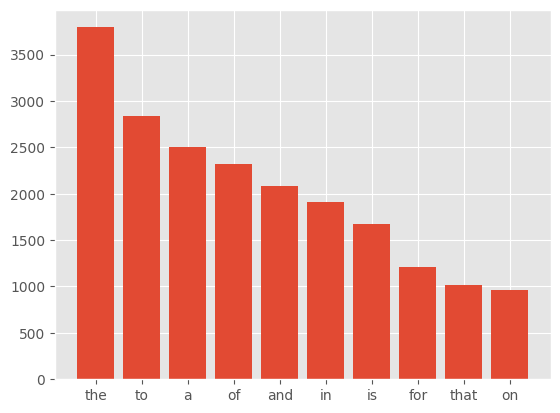

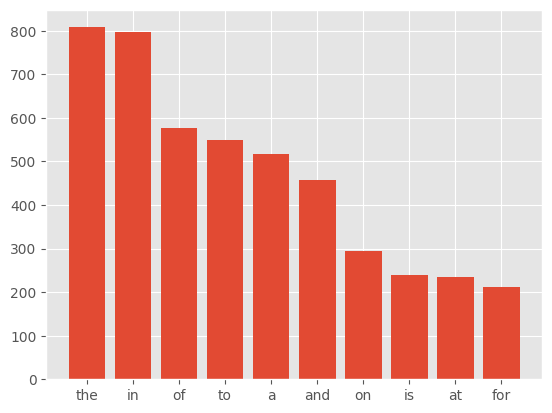

In [26]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def plot_stopwords(label):
    tweets_stopwords = {}
    for words in data[data['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(stopwords.words('english')))
        for w in sw:
            if w in tweets_stopwords.keys():
                tweets_stopwords[w] += 1
            else:
                tweets_stopwords[w] = 1

    top = sorted(tweets_stopwords.items(), key=lambda x:x[1],reverse=True)[:10]
    plt.bar(*zip(*top))
    plt.show()

plot_stopwords(0)
plot_stopwords(1)

This will display the 10 most frequent stopwords in disaster and non-disaster tweets separately.

## 2.6 Punctuation Marks Analysis

Next, we analyze the punctuation marks used in the tweets. Punctuation marks can play a role in sentiment analysis and text classification. We examine the most frequently used punctuation marks in both disaster-related and non-disaster-related tweets:

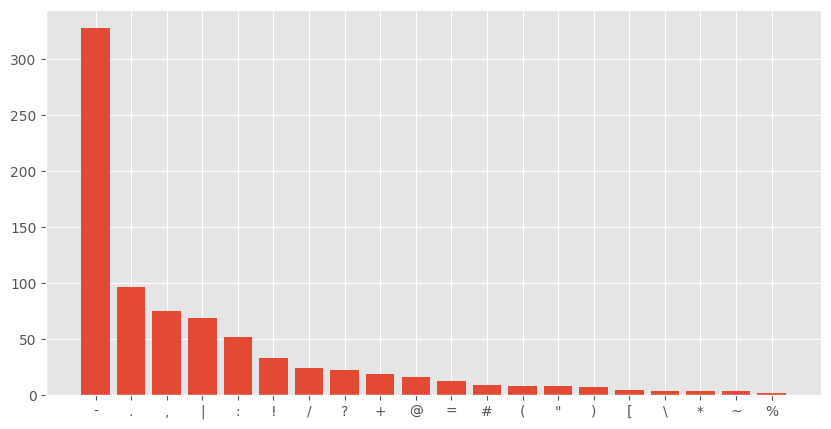

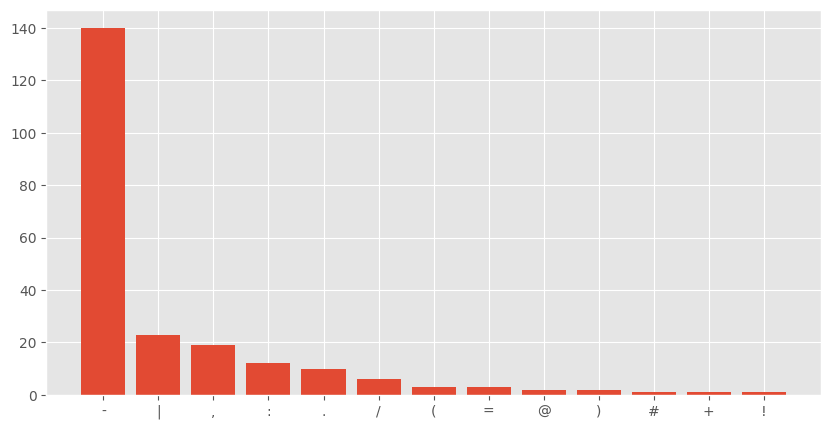

In [27]:
import string

def plot_punctuation(label):
    tweets_punctuation = {}
    for words in data[data['target'] == label]['text'].str.split():
        sw = list(set(words).intersection(string.punctuation))
        for w in sw:
            if w in tweets_punctuation.keys():
                tweets_punctuation[w] += 1
            else:
                tweets_punctuation[w] = 1

    top = sorted(tweets_punctuation.items(), key=lambda x:x[1], reverse=True)[:20]
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*top))
    plt.show()

plot_punctuation(0)
plot_punctuation(1)


This will plot the most common punctuation marks for both types of tweets.

## 2.7 N-grams Analysis

Finally, we perform an analysis of n-grams, which are sequences of n consecutive words. N-grams are useful for capturing patterns in text and can help us understand frequently occurring phrases or expressions.

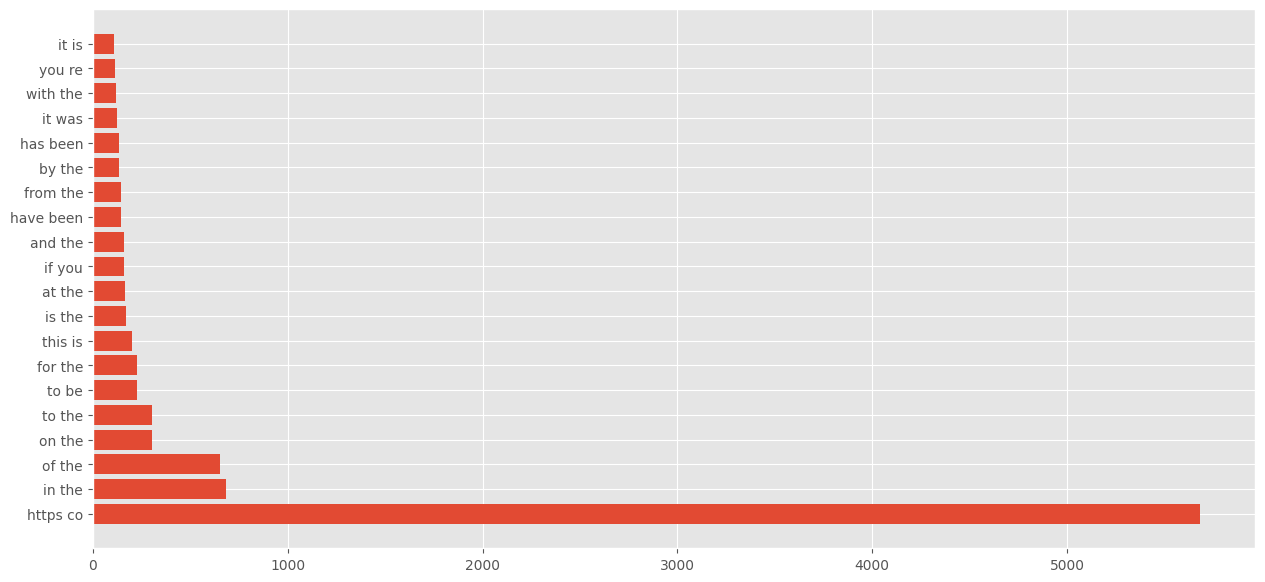

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(data['text']).sum(axis=0)

# Calculate frequency of n-grams
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

This analysis will highlight the top 20 most frequent 2-grams (bigrams) in the dataset.

These visualizations and additional feature calculations provide deeper insights into the structure and content of the dataset. By understanding features like word count, stopwords, punctuation marks, and n-grams, we can better prepare our data for modeling. Moreover, the analysis helps identify any potential biases or patterns that could influence the performance of the model, ensuring that we approach the task of disaster tweet classification in a well-informed manner.

## 3. Data Cleaning

Data cleaning is a crucial step in preparing a dataset for analysis and machine learning. The goal is to remove unnecessary or problematic elements from the data that could potentially introduce noise or lead to incorrect interpretations. In this section, we will apply several techniques to clean the tweet texts in our dataset.

### 3.1 Removing URLs

One common issue in text data, especially from social media platforms like Twitter, is the presence of URLs. URLs can distract the model and are often irrelevant to the task of tweet classification. Therefore, we define a function to remove URLs from the text using regular expressions.


In [29]:
import re

def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

# Example of removing a URL from a tweet with a different structure
remove_url("Check out this amazing article on machine learning: https://www.example.com/articles/deep-learning-tutorial")

'Check out this amazing article on machine learning: '

## 3.2 Removing HTML Tags
HTML tags may appear in some tweets, especially when they contain rich text or references to web pages. These tags don't contribute to the meaning of the tweet and should be removed. We can use the `HTMLParser` class to strip HTML tags from the text.

In [30]:
from html.parser import HTMLParser

class HTMLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.fed = []

    def handle_data(self, d):
        self.fed.append(d)

    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = HTMLStripper()
    s.feed(text)
    return s.get_data()

# Example of removing HTML tags from a string
remove_html('<tr><td align="left"><a href="../../issues/51/16.html#article">Phrack World News</a></td>')

'Phrack World News'

## 3.3 Removing Emojis

Emojis are often used in tweets to convey emotions or sentiments. While they can be useful for sentiment analysis, they are generally not relevant for a classification task such as disaster prediction. We remove emojis using a regular expression pattern that targets Unicode characters corresponding to emojis.

In [31]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Example of removing emojis from a tweet
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

## 3.4 Removing Punctuation
Punctuation marks can sometimes be useful in text analysis, but they often do not add meaningful information for classification tasks. For simplicity, we can remove punctuation from the tweets.

In [32]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Example of removing punctuation from a tweet
remove_punctuation("hello #how are you?")

'hello how are you'

## 3.5 Applying Cleaning Functions to the Dataset
Now that we have defined the functions to remove** URLs, HTML tags, emojis**, and punctuation, we apply them to both the training and testing datasets. This ensures that the data is cleaned before any further processing or model training.

In [33]:
# Apply cleaning functions to the training set
X_train_prep = data.copy()
X_train_prep['text'] = data['text'].apply(remove_url)
X_train_prep['text'] = data['text'].apply(remove_html)
X_train_prep['text'] = data['text'].apply(remove_emoji)
X_train_prep['text'] = data['text'].apply(remove_punctuation)

# Apply cleaning functions to the testing set
X_test_prep = data.copy()
X_test_prep['text'] = data['text'].apply(remove_url)
X_test_prep['text'] = data['text'].apply(remove_html)
X_test_prep['text'] = data['text'].apply(remove_emoji)
X_test_prep['text'] = data['text'].apply(remove_punctuation)

## 3.6 Analyzing N-Grams After Data Cleaning
Once the data has been cleaned, we can proceed with feature extraction. For example, we can analyze n-grams (sequences of words) to see which combinations of words are most frequent in the cleaned training set. Here, we calculate the most frequent bigrams (two-word sequences).

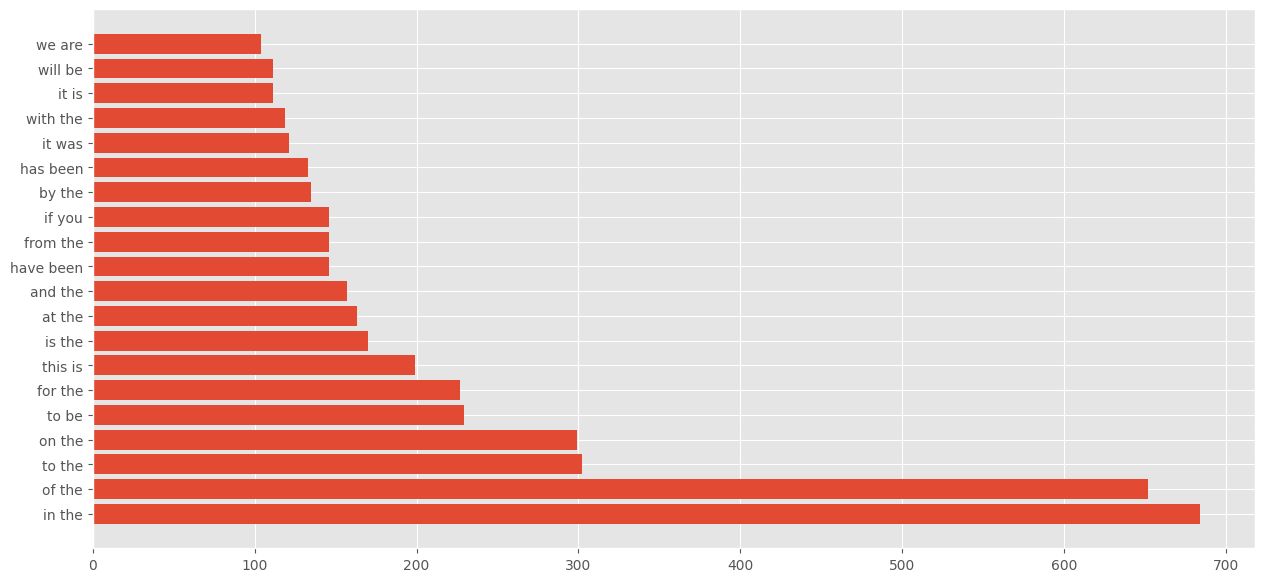

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2, 2))
sum_words = cv.fit_transform(X_train_prep['text']).sum(axis=0)

# Calculate frequency of n-grams
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]

# Plot the most frequent bigrams
plt.figure(figsize=(15, 7))
plt.barh(*zip(*words_freq))
plt.show()

Data cleaning is a fundamental step in the text preprocessing pipeline. By removing irrelevant elements such as URLs, HTML tags, emojis, and punctuation marks, we ensure that our model focuses on the meaningful content of the tweets. Once the data is cleaned, we can proceed with further analysis and feature extraction, which will provide the model with cleaner, more relevant input for training.

## 4. Vectorization of the Dataset

In this section, we will transform the textual data into numerical vectors using the **TF-IDF** (Term Frequency-Inverse Document Frequency) method. This is a common technique used in natural language processing (NLP) to convert text data into a form that can be fed into machine learning models. The goal of TF-IDF is to reflect the importance of a word within a document relative to its frequency across all documents.

### 4.1 Preparing Target Labels

Before performing the vectorization, we need to separate the target labels (the classification labels) from the input data (the text of the tweets). The target labels are stored in the `Y_train` variable, which contains the classification for each tweet (0 for non-disaster, 1 for disaster).

In [36]:
Y_train = X_train_prep['target']

### 4.2 Applying TF-IDF Vectorization

We use the **TfidfVectorizer** from **scikit-learn** to convert the tweet text into numerical vectors. This vectorizer transforms each tweet into a vector where each element represents the importance of a specific word in the tweet.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train_prep['text'])

# Convert the sparse matrix to a dense array for easier handling
X_train = X_train.toarray()

# Display the transformed training data
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Once the training data is vectorized, we apply the same transformation to the test set, which ensures that both training and testing data are represented in the same vector space.

In [38]:
# Transform the test data using the fitted vectorizer
X_test = vectorizer.transform(X_test_prep['text'])

# Convert the sparse matrix to a dense array
X_test = X_test.toarray()

Now, both `X_train` and `X_test` contain the vectorized representations of the tweets, which can be used for training machine learning models.

# 5. Data Splitting
In machine learning, it is essential to evaluate the model's performance on data that it hasn't seen during training. To do this, we split the data into training, validation, and testing sets.

## 5.1 Splitting the Data into Training and Validation Sets
We will first split the dataset into training and validation sets. This is done to evaluate the model's performance on data that it hasn't been trained on but still comes from the same distribution.

We use the train_test_split function from scikit-learn to perform this split, reserving 15% of the data for validation.

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (15% for validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15)

# Print the sizes of the resulting datasets
print("Training subset length: ", len(X_train))
print("Validation subset length: ", len(X_val))
print("Test subset length: ", len(X_test))

Training subset length:  9664
Validation subset length:  1706
Test subset length:  11370


## 5.2 Dataset Summary
After splitting the data, we print the lengths of the training, validation, and testing subsets to ensure that the split was performed correctly. The training data will be used to train the model, the validation data will be used for hyperparameter tuning and performance evaluation during training, and the test data will be used to evaluate the final model's performance.

## 6. Model Construction

In this section, we will construct a neural network model to classify tweets as related to disasters or not. The model uses the **Keras** framework with the **TensorFlow** backend.

The previous model had some basic layers and dropout. To improve it, we will increase the complexity of the network, incorporate **regularization** techniques, and introduce **EarlyStopping** to prevent overfitting.

### 6.1 Building the Neural Network Model

We will start by defining a **Sequential** model, adding **Dense** layers for fully connected neurons, **Dropout** layers to prevent overfitting, and **regularization** techniques to improve generalization.


In [60]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Define the model architecture
model = models.Sequential()

# Add the first hidden layer with 16 units and ReLU activation
model.add(layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Add a dropout layer to prevent overfitting
model.add(layers.Dropout(0.4))

# Add a second hidden layer with 16 units and ReLU activation
model.add(layers.Dense(16, activation='relu'))

# Add another dropout layer
model.add(layers.Dropout(0.4))

# Add the output layer with a single unit and sigmoid activation for binary classification
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 6.2 Early Stopping and Model Fitting
To avoid overfitting, we will use **EarlyStopping**. This callback will monitor the validation loss and stop training if no improvement is seen after a certain number of epochs.

In [61]:
# Early stopping callback to monitor validation loss and prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model on the training data
history = model.fit(
    X_train,
    Y_train,
    epochs=100,
    batch_size=1024,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 623ms/step - Precision: 0.1857 - accuracy: 0.7500 - loss: 0.6881 - val_Precision: 0.0000e+00 - val_accuracy: 0.8124 - val_loss: 0.6742
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - Precision: 0.0000e+00 - accuracy: 0.8158 - loss: 0.6675 - val_Precision: 0.0000e+00 - val_accuracy: 0.8124 - val_loss: 0.6507
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - Precision: 0.0000e+00 - accuracy: 0.8087 - loss: 0.6418 - val_Precision: 0.0000e+00 - val_accuracy: 0.8124 - val_loss: 0.6234
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - Precision: 0.0000e+00 - accuracy: 0.8154 - loss: 0.6121 - val_Precision: 0.0000e+00 - val_accuracy: 0.8124 - val_loss: 0.5932
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - Precision: 0.0000e+00 - accuracy: 0.8134 - loss: 0.5799 - val_Precision: 0.0000e+00 - val_accuracy: 0.8124 - val_loss: 0.5608
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - Precision: 0.0000e+00 - accuracy: 0.8106 - loss

## 6.3 Model Evaluation and Visualization
Once the model is trained, we can visualize the loss and validation loss to monitor the training process. We will use Matplotlib to plot these curves.

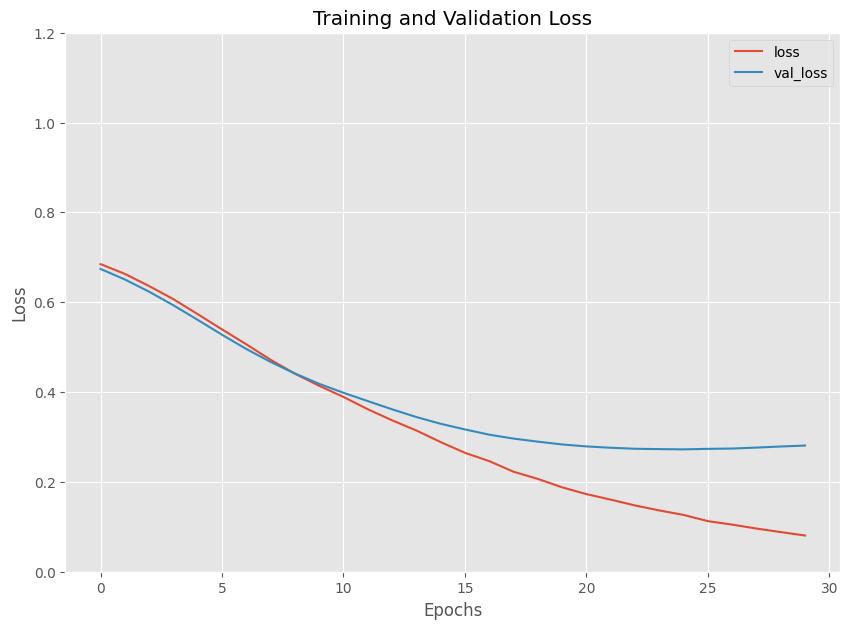

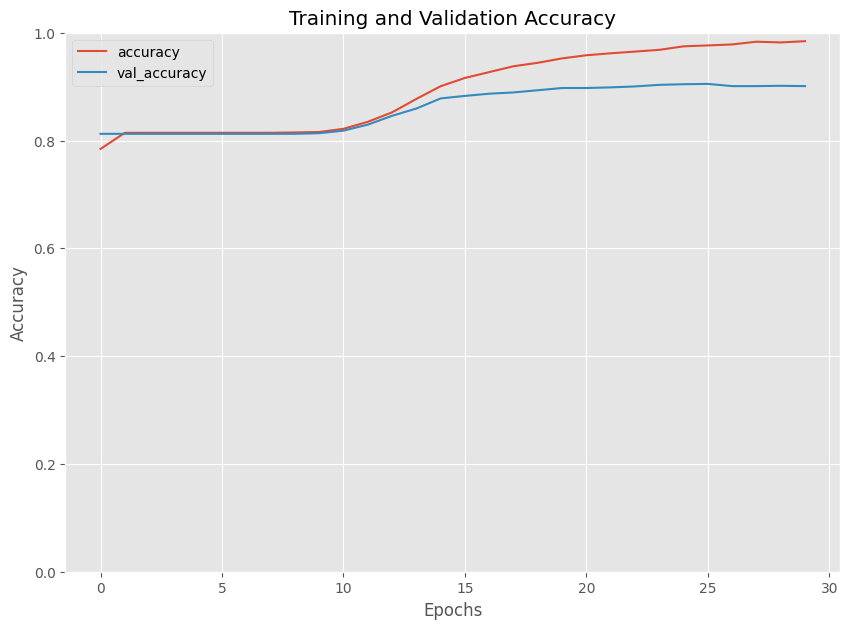

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot training and validation loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

# Plot accuracy and validation accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.show()

In [83]:
tweets = [
    "A 6.2 magnitude earthquake has struck Concepción. Coastal areas should evacuate due to tsunami risk.",
    "A red alert has been issued for wildfires in the Valparaíso region. Residents are urged to evacuate immediately and follow emergency instructions.",
    "Strong shaking felt in the area. Possible aftershocks.",
    "Due to heavy rainfall, the Paraná River has overflowed, causing floods in Santa Fe province. Donations of food and clothing are needed.",
    "Smoke in the air. Stay indoors and monitor local news.",
    "River levels rising. Avoid low-lying areas. Stay informed."
]

example_tweets_preprocessed = vectorizer.transform(tweets)

# Make predictions with the model
example_predictions = model.predict(example_tweets_preprocessed)

# Round the predicted probabilities to 0 or 1
example_predictions_labels = np.round(example_predictions)

print("Example Tweets and Predictions:")
for tweet, prediction in zip(tweets, example_predictions_labels):
 print(f"Tweet: {tweet}")
 print(f"Predicted Label: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Example Tweets and Predictions:
Tweet: A 6.2 magnitude earthquake has struck Concepción. Coastal areas should evacuate due to tsunami risk.
Predicted Label: [1.]
Tweet: A red alert has been issued for wildfires in the Valparaíso region. Residents are urged to evacuate immediately and follow emergency instructions.
Predicted Label: [1.]
Tweet: Strong shaking felt in the area. Possible aftershocks.
Predicted Label: [1.]
Tweet: Due to heavy rainfall, the Paraná River has overflowed, causing floods in Santa Fe province. Donations of food and clothing are needed.
Predicted Label: [0.]
Tweet: Smoke in the air. Stay indoors and monitor local news.
Predicted Label: [0.]
Tweet: River levels rising. Avoid low-lying areas. Stay informed.
Predicted Label: [0.]


In [82]:
for i in range(30):
    tweet = X_train_prep['text'][i]
    tweet_label = X_train_prep['target'][i]
    tweet_preprocessed = vectorizer.transform([tweet])
    tweet_prediction = model.predict(tweet_preprocessed)
    tweet_prediction_label = np.round(tweet_prediction)
    print("{} - {} - {}".format(tweet, tweet_label, tweet_prediction_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Communal violence in Bhainsa Telangana Stones were pelted on Muslims houses and some houses and vehicles were set ablaze… - 1 - [[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Telangana Section 144 has been imposed in Bhainsa from January 13 to 15 after clash erupted between two groups on January 12 Po… - 1 - [[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Arsonist sets cars ablaze at dealership httpstcogOQvyJbpVI - 1 - [[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Arsonist sets cars ablaze at dealership httpstco0gL7NUCPlb httpstcou1CcBhOWh9 - 1 - [[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Lord Jesus your love brings freedom and pardon Fill me with your Holy Spirit and set my heart ablaze with your l… httpstcoVlTznnPNi8 - 0 - [[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
If this child was Chinese this tweet would have gone viral Social media would be ablaze SNL would have made a racist j… - 0 - [[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Several 

## 6.4 Model Summary
After training the model, it's useful to view a summary of the architecture to understand the number of parameters and layers involved:

In [84]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 16)                  │         453,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,359,941 (5.19 MB)

 Trainable params: 453,313 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 906,628 (3.46 MB)

With these changes, we have:

* Increased the **depth** and **complexity** of the network, allowing it to learn more complex patterns.
* Applied **regularization** (L2) and **Dropout layers to combat overfitting**.
* Used **EarlyStopping** to stop training early if validation performance doesn't improve, saving time and computational resources.
* Monitored additional metrics like Recall and AUC for better evaluation of model performance, especially for imbalanced classes.

This improved model should yield better performance in classifying disaster-related tweets.

Once the model has been trained, it's crucial to evaluate its performance on a test dataset to understand how well it generalizes to unseen data. To do this, we use the evaluate function provided by the Keras API in TensorFlow.

In [87]:
error, accuracy, precision = model.evaluate(X_val, Y_val)
print("Error: ", error)
print("Accuracy: ", accuracy)
print("Precision: ", precision)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Precision: 0.8120 - accuracy: 0.8979 - loss: 0.2849
Error:  0.2724160850048065
Accuracy:  0.9044548869132996
Precision:  0.8340425491333008


* **Error:** It is the loss obtained by the model on the test dataset.
* **Accuracy:** It is the model's accuracy on the test dataset, i.e., the fraction of samples classified correctly.
* **Precision:** It is a measure of the model's precision in predicting positive samples relative to all samples predicted as positive.

These values provide us with a quantitative understanding of the model's performance and help us determine its effectiveness in the classification task.

## Saving the Trained Model and Weights
After training a deep learning model, it's essential to save both the model architecture and its trained weights for future use or deployment. We can achieve this in TensorFlow using the save method provided by the Keras API.


In [91]:
# Define the file paths for saving the model and weights
model_path = 'trained_model/model.h5'
weights_path = 'trained_model/.weights.h5'

# Save the trained model architecture
model.save(model_path)

# Save the trained model weights
model.save_weights(weights_path)